In [86]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gp

In [151]:
abnb_df = pd.read_csv('abnb_clean.gz', low_memory=False)
#pd.read_csv(item, skipinitialspace=True, usecols=copy_cols1, sep=',', low_memory = False)
abnb_df = abnb_df.drop(columns = 'Unnamed: 0')
#abnb_df['last_scraped'] = pd.to_datetime(abnb_df['last_scraped'], infer_datetime_format = True )
abnb_df['year'] = pd.to_datetime(abnb_df['last_scraped']).dt.to_period('Y')
abnb_df['availability_pct'] = abnb_df['availability_365']/365 *100

In [115]:
year_count = list(abnb_df.groupby(['year'])['id'].size())
years = ['2015','2016','2017','2018','2019','2020','2021','2022']

In [142]:
abnb_df.keys()

Index(['id', 'last_scraped', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'bedrooms', 'availability_365',
       'calculated_host_listings_count', 'geom', 'zipcode', 'borough',
       'availability_pct'],
      dtype='object')

In [105]:
def listing_clean(data):
    year_count = list(data.groupby(['year'])['id'].size())
    x=len(years)
    print('Number of NYC Airbnb Listings per Year:')
    for i in range(0,x):
        print('\t'+years[i] +':',year_count[i])
#    print('Number of features in dataset:', data.shape[1])
#    print('Avarage price is : $',round(data.price.mean()))
#    print('Number of hosts/suppliers: ', data.host_id.nunique())
#    print('Number of suburbs: ', data.neighbourhood.nunique())
    return

In [106]:
listing_clean(abnb_df)

Number of NYC Airbnb Listings per Year:
	2015: 33446
	2016: 39133
	2017: 46742
	2018: 48191
	2019: 49773
	2020: 36275
	2021: 36116
	2022: 45827


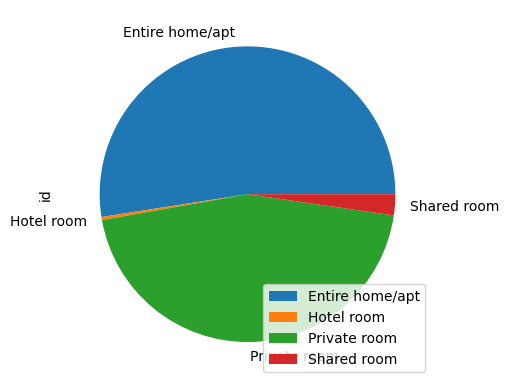

In [107]:
abnb_df.groupby(['room_type']).count().plot(kind='pie', y='id')
plt.legend(loc = 'lower right')
plt.show()

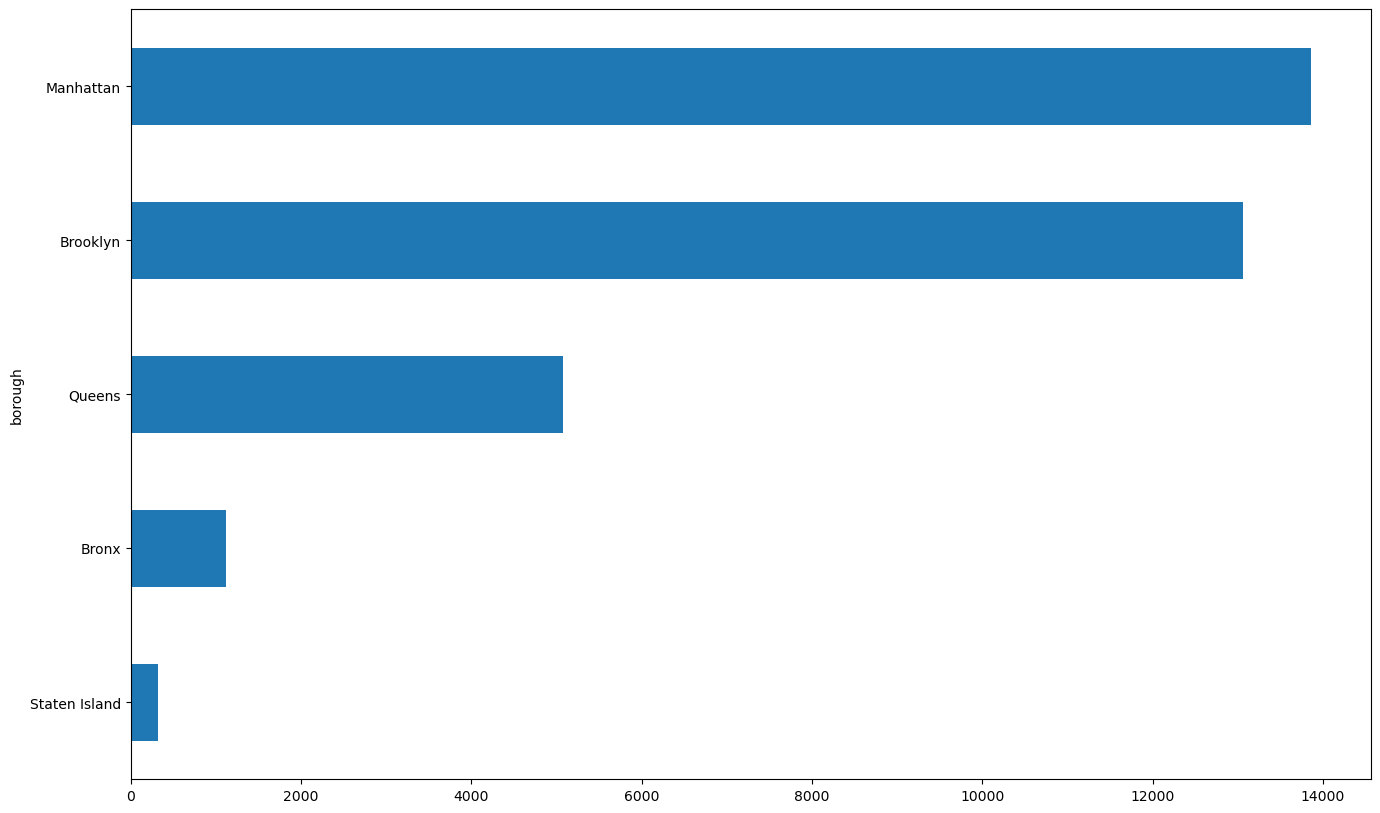

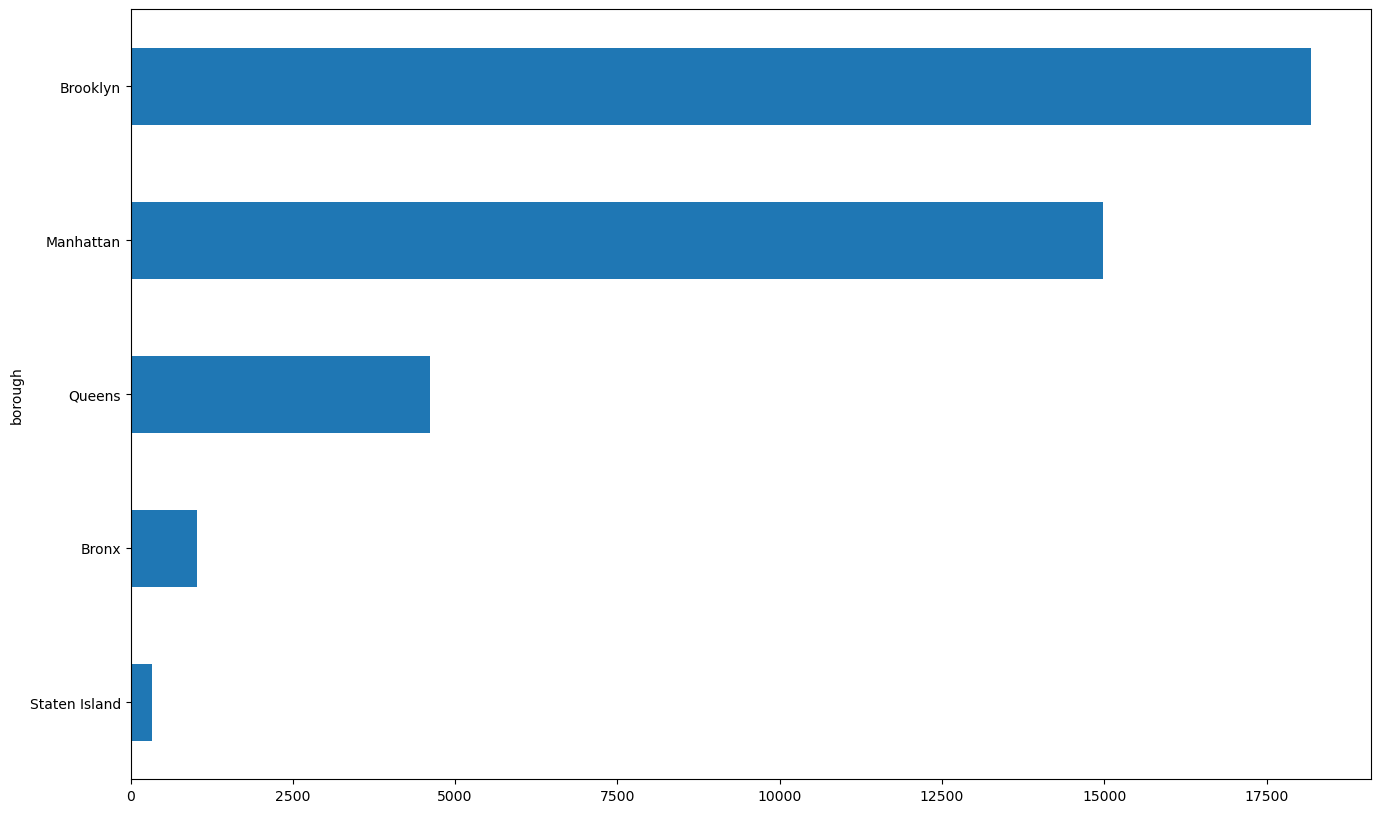

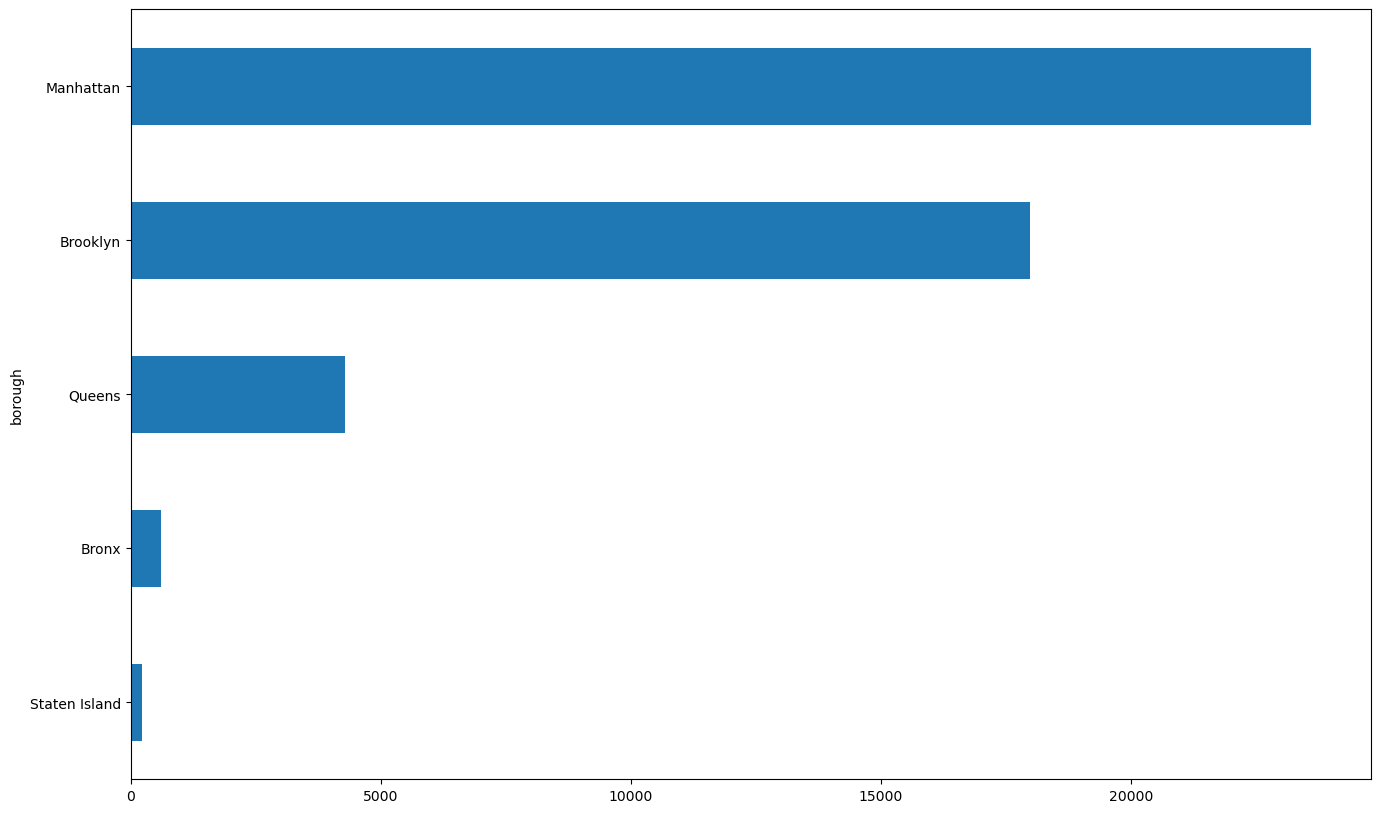

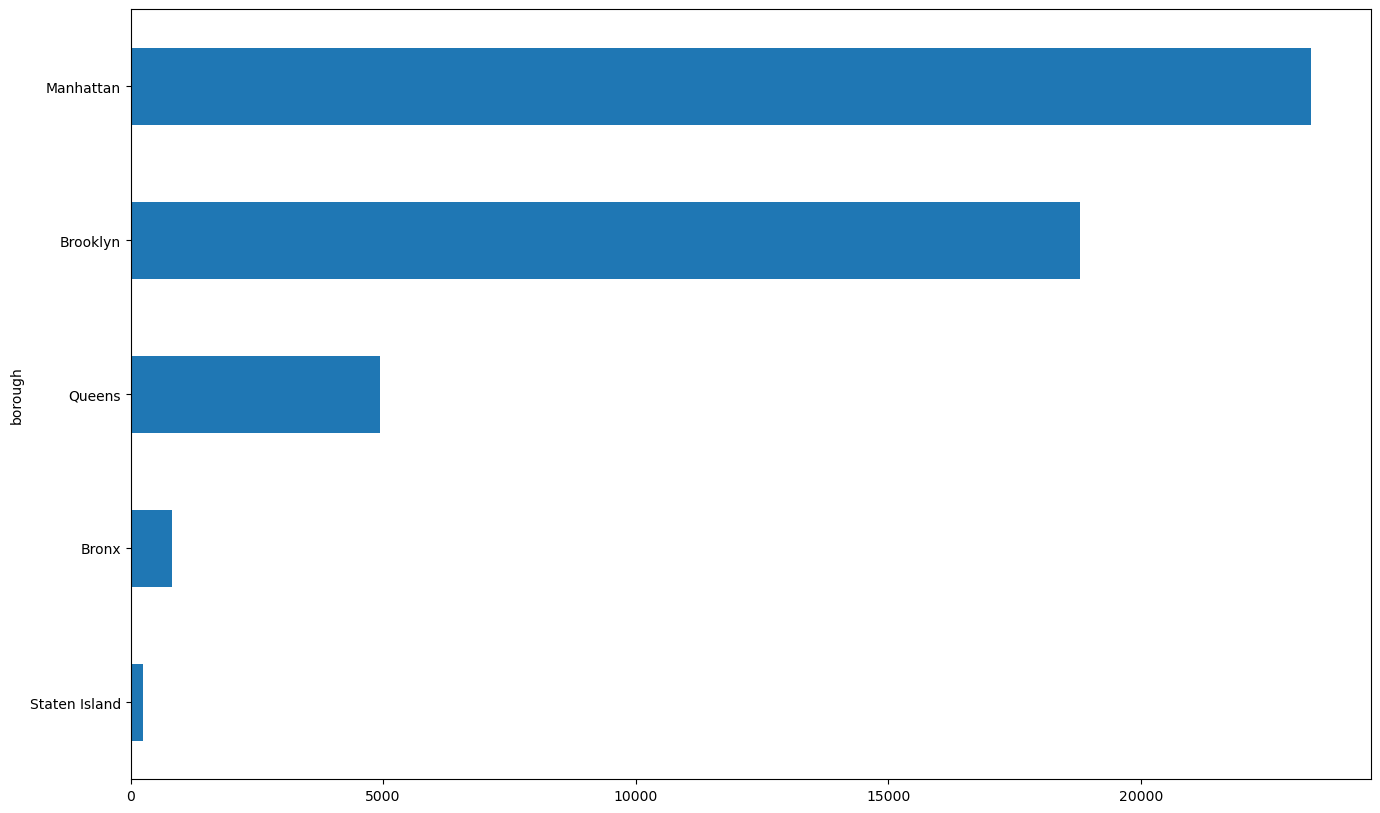

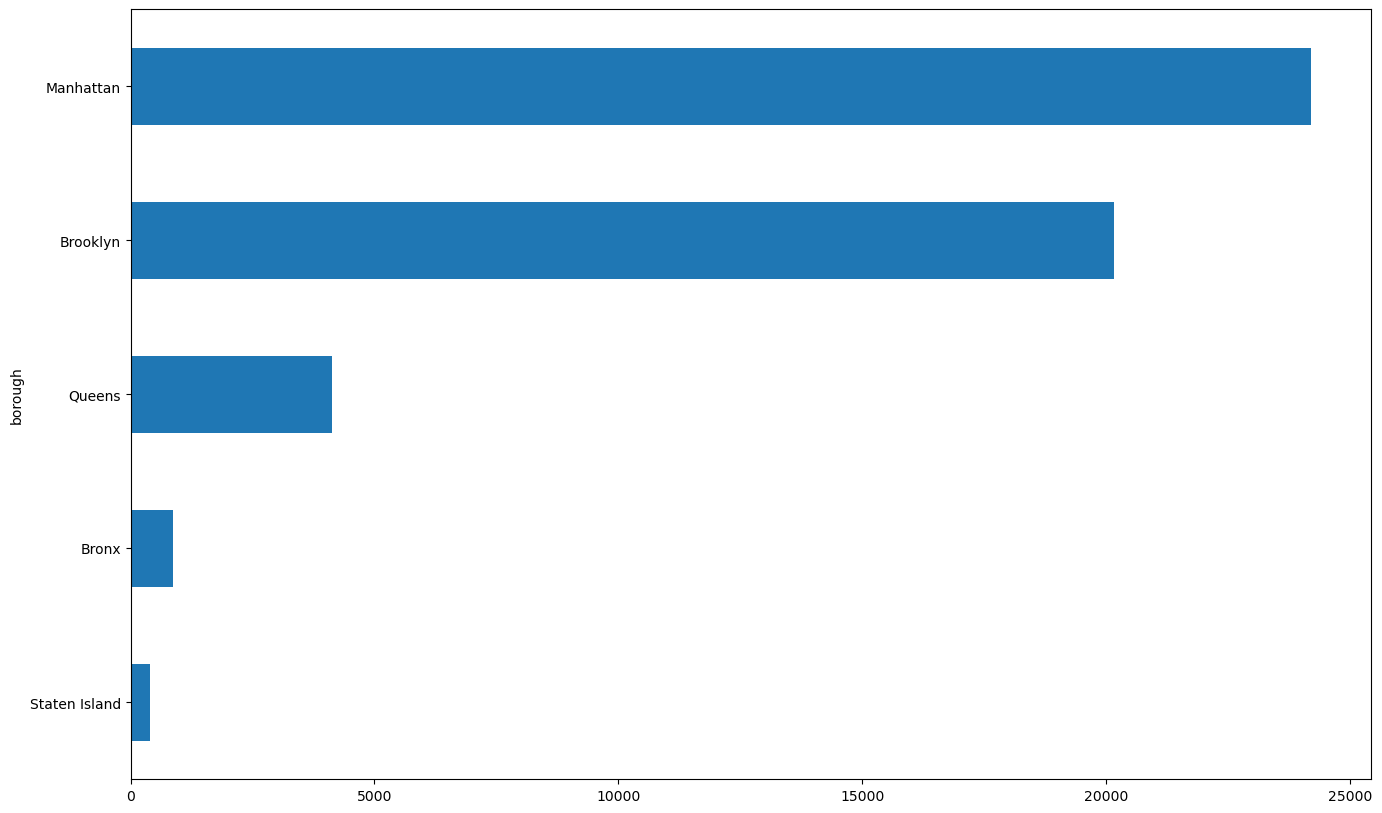

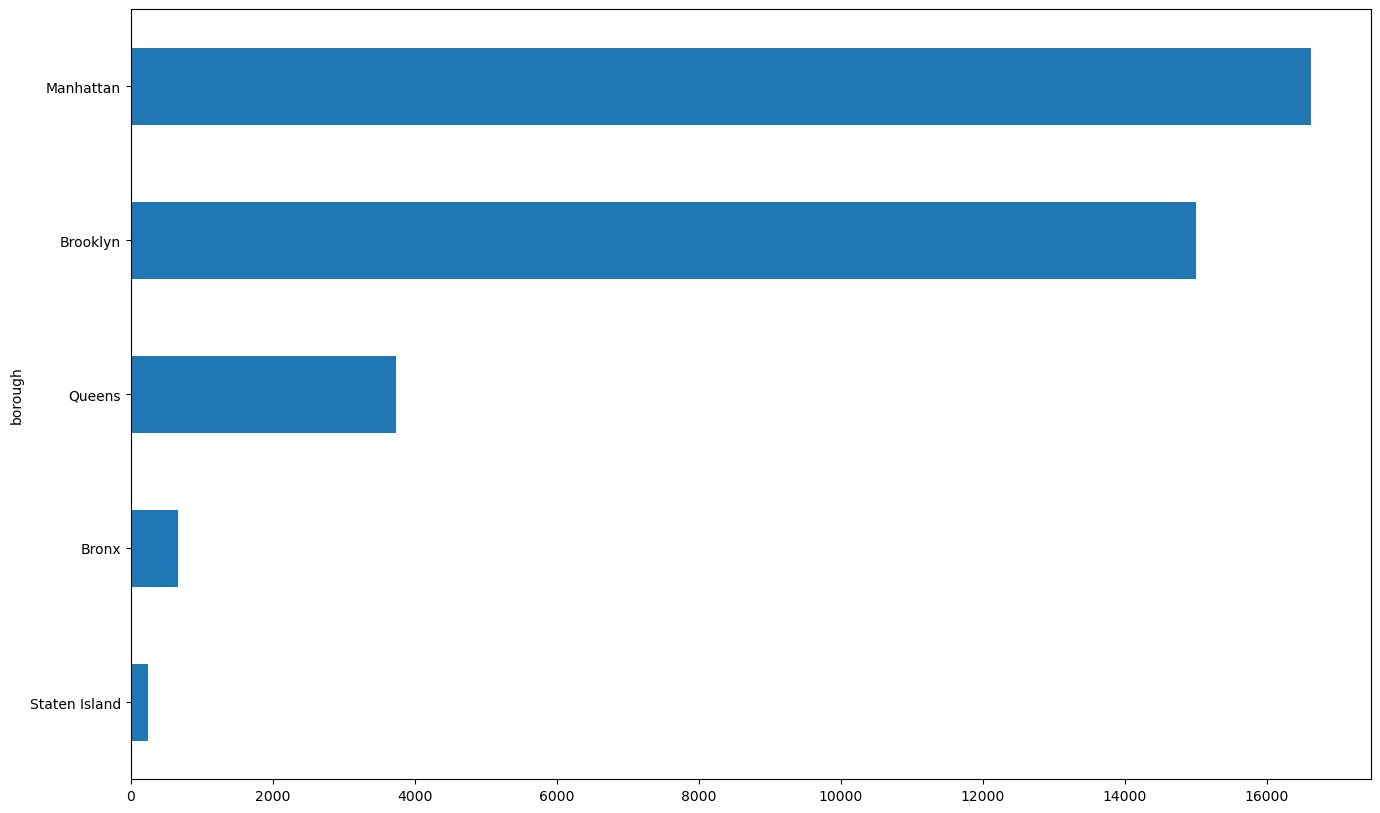

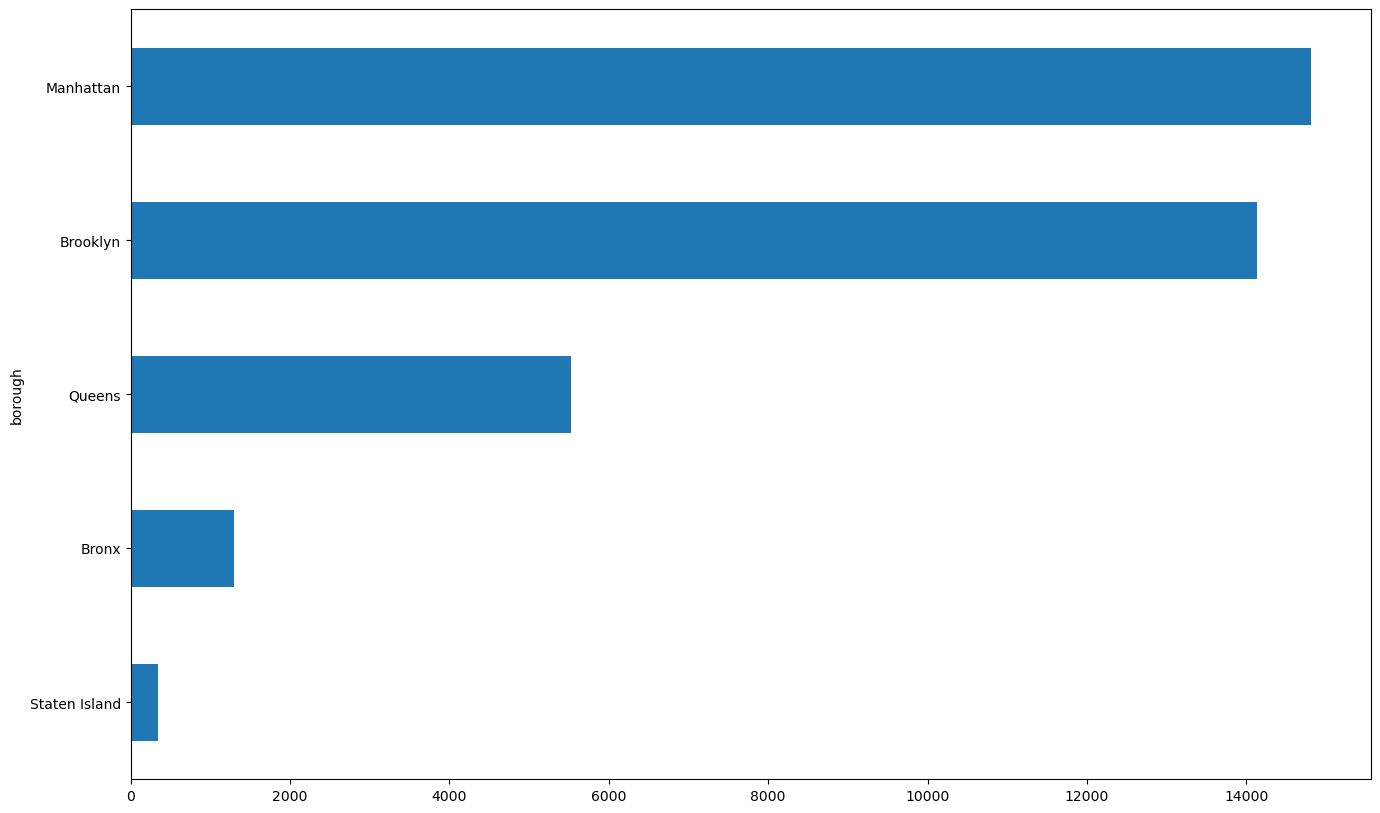

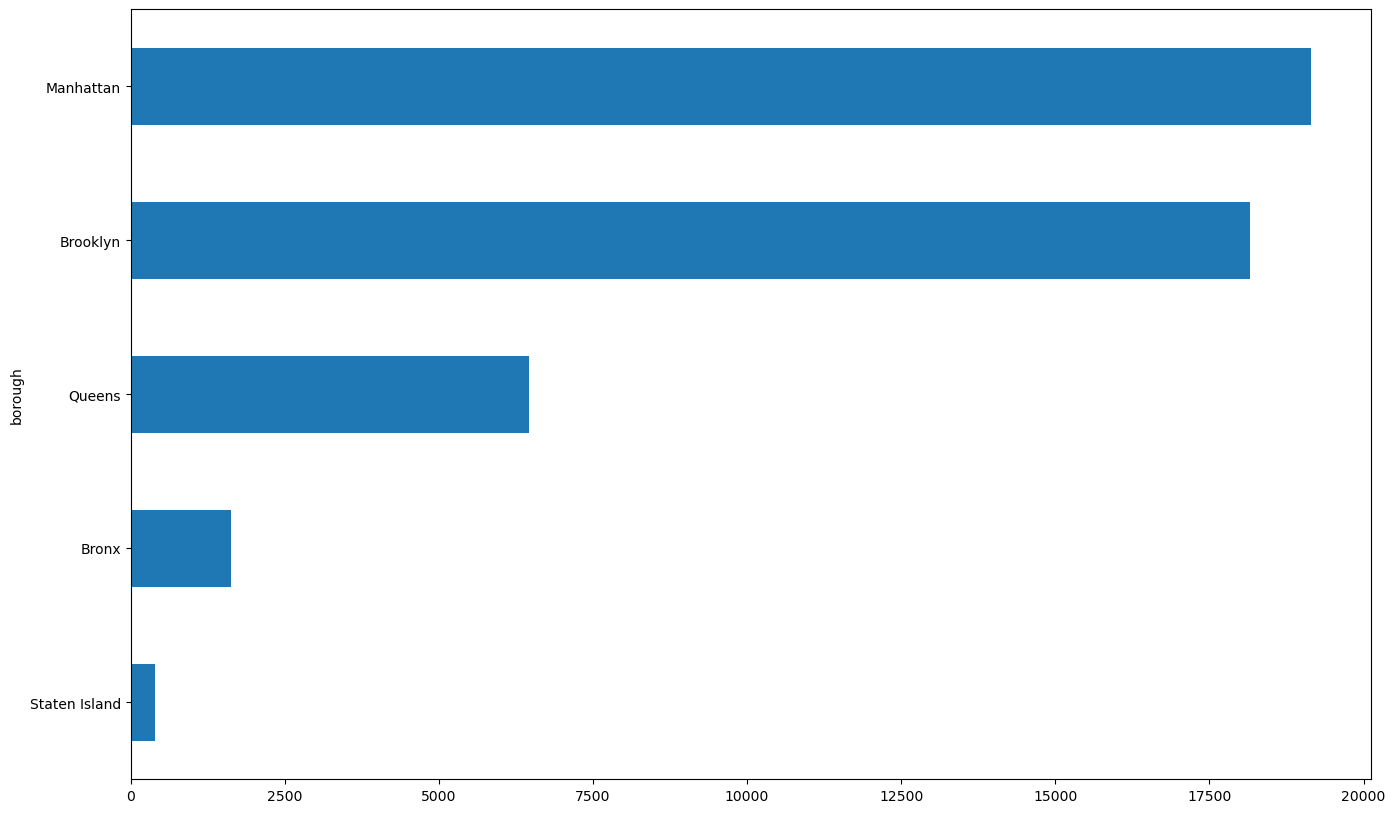

In [116]:
x = len(years)
for i in range(0,x):
    plt.figure(figsize =(16,10))
    abnb_df[abnb_df['year'] == years[i]].groupby(['borough'])['id'].count().sort_values().plot.barh()
    plt.show()

In [111]:
# Create comparison chart for all boros and NYC based on `value` column
def boro_comparison_line(df, value):
    data = df[["borough", "year", value]]
#    nyc_data = get_nyc_data(df, value)
#    data = pd.concat([data, nyc_data])
    chart = sns.lineplot(x="year", y=value, hue="borough", data=data)
    chart.axes.set_title(value.replace("_", " ").upper())

In [133]:
abnb_df

,id,last_scraped,host_id,host_name,neighbourhood,latitude,longitude,room_type,bedrooms,availability_365,calculated_host_listings_count,geom,zipcode,borough,year,availability_pct
0,2539,2022-09-07,2787,John,Kensington,40.64529,-73.97238,Private room,1.0,356,9,"40.64529,-73.97238",11218,Brooklyn,2022,97.534247
1,5121,2022-09-07,7356,Garon,Bedford-Stuyvesant,40.68535,-73.95512,Private room,1.0,335,2,"40.68535,-73.95512",11238,Brooklyn,2022,91.780822
2,45910,2022-09-07,204539,Mark,Ridgewood,40.70309,-73.89963,Entire home/apt,5.0,365,6,"40.70309,-73.89963",11385,Queens,2022,100.000000
3,5136,2022-09-07,7378,Rebecca,Sunset Park,40.66265,-73.99454,Entire home/apt,2.0,179,1,"40.66265,-73.99454",11215,Brooklyn,2022,49.041096
4,45935,2022-09-07,204586,L,Mott Haven,40.80635,-73.92201,Private room,1.0,83,1,"40.80635,-73.92201",10454,Bronx,2022,22.739726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335498,46937371,2020-01-01,27181542,Jt,Kips Bay,40.73961,-73.97971,Entire home/apt,NaN,180,15,"40.73961,-73.97971",11217,Brooklyn,2020,49.315068
335499,46937954,2020-01-01,287807769,Allen,Upper West Side,40.78061,-73.98514,Entire home/apt,NaN,83,1,"40.78061,-73.98514",11226,Brooklyn,2020,22.739726
335500,46938514,2020-01-01,303319010,Naiomy,East Harlem,40.80054,-73.93340,Shared room,NaN,176,1,"40.80054,-73.9334",11226,Brooklyn,2020,48.219178
335501,46938537,2020-01-01,3351317,Clara,Kips Bay,40.74033,-73.98242,Entire home/apt,NaN,83,3,"40.74033,-73.98242",10115,Manhattan,2020,22.739726


In [152]:
df = abnb_df.groupby(['year','borough'])['id'].count().to_frame()
df = df.rename(columns={'id':'id_count'}).reset_index()
#rename_years = {45:2015,46:2016,47:2017,48:2018,49:2019,50:2020,51:2021,52:2022}
df.replace([45, 46, 47, 48,49,50,51,52],['2015','2016','2017','2018','2019','2020','2021','2022'])
df['year'] = df['year'].astype(int)
df['year'] = df['year'].replace([45, 46, 47, 48,49,50,51,52],['2015','2016','2017','2018','2019','2020','2021','2022'])
df

,year,borough,id_count
0,2015,Bronx,1122
1,2015,Brooklyn,13056
2,2015,Manhattan,13865
3,2015,Queens,5076
4,2015,Staten Island,327
5,2016,Bronx,1017
6,2016,Brooklyn,18192
7,2016,Manhattan,14984
8,2016,Queens,4616
9,2016,Staten Island,324


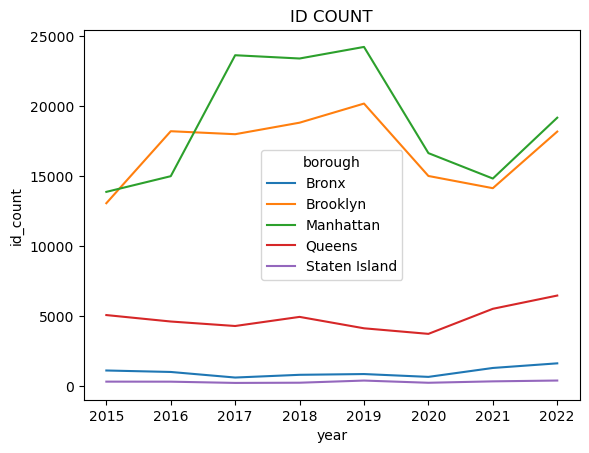

In [153]:
boro_comparison_line(df,'id_count')